In [5]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.models import Word2Vec

# Exploratory Data Analysis

In [7]:
import json
import string
import spacy
from spacy.lang.en import English
import numpy as np
import pandas as pd
from matplotlib import rc, pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from fastai.text import TextList
import seaborn as sns
from collections import Counter
import plotly.express as px
import re

In [8]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk import stem

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Data Cleaning

In [10]:
ds = pd.read_csv("indeed_jos_acc222.csv")

In [11]:
ds= ds.replace("undecided", None)

In [12]:
ds.isnull().sum()

Unnamed: 0           0
job_url              0
job_title            0
company              0
salary             885
job_type           284
job_description      0
dtype: int64

In [14]:
ds.describe()

,Unnamed: 0
count,2079.000000
mean,1039.000000
std,600.299925
min,0.000000
25%,519.500000
50%,1039.000000
75%,1558.500000
max,2078.000000


In [13]:
ds['job_type']= ds['job_type'].str.strip("Job Type")

In [14]:
ds.drop_duplicates(inplace=True)

In [15]:
ds.dropna(inplace=True)

In [16]:
ds['salary'] = ds['salary'].str.replace(',', '')
ds['minimum_salary'] = ds['salary'].str.extract(r'(\d+)').astype(int)
ds['minimum_salary'] = ds['minimum_salary'].fillna(0)

In [17]:
ds.describe()

,Unnamed: 0,minimum_salary
count,1058.000000,1058.000000
mean,1039.694707,57601.536862
std,600.786972,31665.399950
min,3.000000,15.000000
25%,505.500000,45000.000000
50%,1043.500000,65000.000000
75%,1553.000000,75000.000000
max,2078.000000,204050.000000


In [18]:
ds.isnull().sum()

Unnamed: 0         0
job_url            0
job_title          0
company            0
salary             0
job_type           0
job_description    0
minimum_salary     0
dtype: int64

In [19]:
def clean_text(text):
    # remove non-alphabetic and non-space characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    # convert to lowercase
    text = text.lower()
    # remove extra whitespaces
    text = re.sub('\s+', ' ', text).strip()
    return text

def clean_salary(salary):
    # remove non-numeric characters
    salary = re.sub('[^0-9]', '', salary)
    return salary

In [20]:

ds['job_title'] = ds['job_title'].apply(clean_text)
# clean company
ds['company'] = ds['company'].apply(clean_text)

# clean job_type
ds['job_type'] = ds['job_type'].apply(clean_text)
# clean job_description
#ds['job_description'] = ds['job_description'].apply(clean_text)
    

### Check for missing values

In [21]:
ds.describe()

,Unnamed: 0,minimum_salary
count,1058.000000,1058.000000
mean,1039.694707,57601.536862
std,600.786972,31665.399950
min,3.000000,15.000000
25%,505.500000,45000.000000
50%,1043.500000,65000.000000
75%,1553.000000,75000.000000
max,2078.000000,204050.000000


In [22]:
ds.isnull().sum()

Unnamed: 0         0
job_url            0
job_title          0
company            0
salary             0
job_type           0
job_description    0
minimum_salary     0
dtype: int64

### Descriptive statistics

In [31]:
ds.describe()

,Unnamed: 0,minimum_salary
count,1058.000000,1058.000000
mean,1039.694707,57601.536862
std,600.786972,31665.399950
min,3.000000,15.000000
25%,505.500000,45000.000000
50%,1043.500000,65000.000000
75%,1553.000000,75000.000000
max,2078.000000,204050.000000


### Distribution of salary

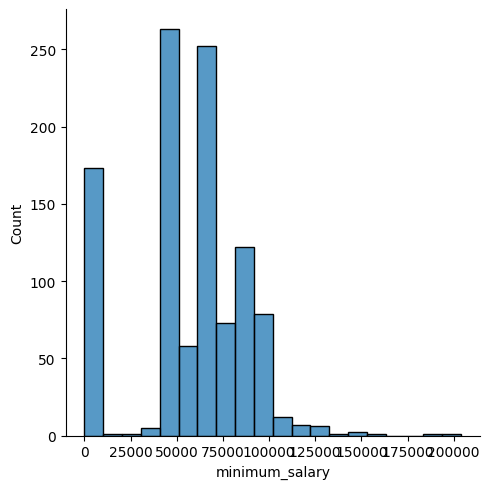

In [23]:
sns.displot(data=ds, x='minimum_salary', bins=20)

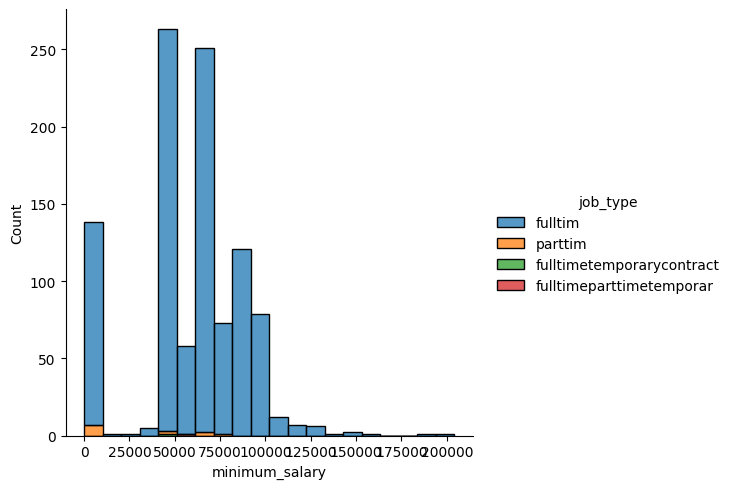

In [33]:
top_4_salaries = ds.groupby('job_type')['minimum_salary'].mean().sort_values(ascending=False).head(4).index.tolist()
sns.displot(data=ds[ds['job_type'].isin(top_4_salaries)], x='minimum_salary', hue='job_type', multiple='stack', bins=20)

### Frequency of job_type

In [34]:
ds['job_type'].value_counts()

fulltim                      1007
fulltimeparttim                30
parttim                        12
contract                        4
fulltimetemporar                1
fulltimetemporarycontract       1
fulltimeparttimetemporar        1
mporar                          1
fulltimecontract                1
Name: job_type, dtype: int64

In [25]:
from nltk.corpus import stopwords
def preprocess_text(text):
    # remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # convert to lowercase
    text = text.lower()
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if not w in stop_words]
    return ' '.join(words)

In [26]:
# preprocess job description text
ds['jd_processed'] = ds['job_description'].apply(preprocess_text)
ds


,Unnamed: 0,job_url,job_title,company,salary,job_type,job_description,minimum_salary,jd_processed
3,3,https://www.indeed.com//rc/clk?jk=0a50981abc1a...,international accountant,electric power research institute,$79815 - $107985 a year,fulltim,\n\n Job Title:\n International Accountant\n...,79815,job title international accountant location ca...
6,6,https://www.indeed.com//rc/clk?jk=3655551ef058...,staff accountant remote,choice market,$50000 - $70000 a year,fulltim,\n Choice Market is committed to making high-q...,50000,choice market committed making highquality hea...
7,7,https://www.indeed.com//rc/clk?jk=995c41ad42cc...,staff accountant,newberry library,$60000 - $70000 a year,fulltim,\n\n\nTO APPLY: Interested candidates should a...,60000,apply interested candidates attach cover lette...
8,8,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,corporate accountant,campus life style,$75000 - $90000 a year,fulltim,Who We Are:\nCampus Life & Style’s mission is ...,75000,campus life styles mission provide unparallele...
9,9,https://www.indeed.com//rc/clk?jk=8b23ee0a06a3...,senior accountant,friday health plans,$73569 - $87422 a year,fulltim,\nWho You Are\n You are ready for an exciting ...,73569,ready exciting opportunity friday health plans...
...,...,...,...,...,...,...,...,...,...
2068,2068,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,accountant,international foundation of employee benefit p...,$45000 - $55000 a year,fulltim,Description:Accountant Position OverviewEntry-...,45000,descriptionaccountant position overviewentryto...
2070,2070,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,corporate accountant pay up to,ilocatum,$65000 - $80000 a year,fulltim,\nCorporate Accountant\n\nFour years of experi...,65000,corporate accountant four years experience acc...
2071,2071,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,corporate accountant pay up to,ilocatum,$65000 - $80000 a year,fulltim,\nCorporate Accountant\n\nFour years of experi...,65000,corporate accountant four years experience acc...
2074,2074,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,corporate accountant,campus life style,$75000 - $90000 a year,fulltim,Who We Are:\nCampus Life & Style’s mission is ...,75000,campus life styles mission provide unparallele...


In [27]:
ds.iloc[0].job_description


"\n\n  Job Title:\n  International Accountant\n \n\n   Location:\n  California Home Office, Charlotte, NC, Maryland Home Office, New York Home Office, North Carolina Home Office, Palo Alto, CA, Remote/Home Based, Washington, D.C., Washington DC Home Office\n \n\n   Job Summary and Description:\n \n\n   The International Accountant's role is to support EPRI International, Inc.'s small accounting team in their ever-growing global business by providing world-class accounting, reporting, and operational support.\n \n\n\n   Key Responsibilities:\n \n\n\n\n     Coordinate timely month-end, quarter-end, and year-end financial close processes for international entities including accurate preparation of journal entries.\n   \n\n\n     Work with Company’s external payroll, accounting, and tax partners to ensure compliance with local requirements.\n   \n\n\n     Review and process vendor and contractor invoices. Reconcile vendor accounts and payments.\n   \n\n\n     Assist with the quarterly fore

In [28]:
ds.iloc[0].jd_processed

'job title international accountant location california home office charlotte nc maryland home office new york home office north carolina home office palo alto ca remotehome based washington dc washington dc home office job summary description international accountants role support epri international incs small accounting team evergrowing global business providing worldclass accounting reporting operational support key responsibilities coordinate timely monthend quarterend yearend financial close processes international entities including accurate preparation journal entries work companys external payroll accounting tax partners ensure compliance local requirements review process vendor contractor invoices reconcile vendor accounts payments assist quarterly forecast bank funding manage accurate reporting international aspects corporate income tax vat returns various countries establish maintain procedures related revaluation foreign currency balances nonusd currency translation related

### Text analysis

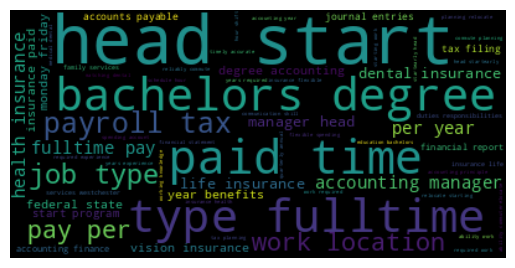

In [29]:
text = ' '.join(ds['jd_processed'].tolist())
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
text=list(ds['job_description'])
text=list(ds['jd_processed'])

In [31]:
ds.head()

,Unnamed: 0,job_url,job_title,company,salary,job_type,job_description,minimum_salary,jd_processed
3,3,https://www.indeed.com//rc/clk?jk=0a50981abc1a...,international accountant,electric power research institute,$79815 - $107985 a year,fulltim,\n\n Job Title:\n International Accountant\n...,79815,job title international accountant location ca...
6,6,https://www.indeed.com//rc/clk?jk=3655551ef058...,staff accountant remote,choice market,$50000 - $70000 a year,fulltim,\n Choice Market is committed to making high-q...,50000,choice market committed making highquality hea...
7,7,https://www.indeed.com//rc/clk?jk=995c41ad42cc...,staff accountant,newberry library,$60000 - $70000 a year,fulltim,\n\n\nTO APPLY: Interested candidates should a...,60000,apply interested candidates attach cover lette...
8,8,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,corporate accountant,campus life style,$75000 - $90000 a year,fulltim,Who We Are:\nCampus Life & Style’s mission is ...,75000,campus life styles mission provide unparallele...
9,9,https://www.indeed.com//rc/clk?jk=8b23ee0a06a3...,senior accountant,friday health plans,$73569 - $87422 a year,fulltim,\nWho You Are\n You are ready for an exciting ...,73569,ready exciting opportunity friday health plans...


In [32]:
!pip install textacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.5 MB/s eta 0:00:00


In [113]:
len(text)

1058

In [114]:
ds.head()

,Unnamed: 0,job_url,job_title,company,salary,job_type,job_description,minimum_salary,jd_processed
3,3,https://www.indeed.com//rc/clk?jk=0a50981abc1a...,international accountant,electric power research institute,$79815 - $107985 a year,fulltim,\n\n Job Title:\n International Accountant\n...,79815,job title international accountant location ca...
6,6,https://www.indeed.com//rc/clk?jk=3655551ef058...,staff accountant remote,choice market,$50000 - $70000 a year,fulltim,\n Choice Market is committed to making high-q...,50000,choice market committed making highquality hea...
7,7,https://www.indeed.com//rc/clk?jk=995c41ad42cc...,staff accountant,newberry library,$60000 - $70000 a year,fulltim,\n\n\nTO APPLY: Interested candidates should a...,60000,apply interested candidates attach cover lette...
8,8,https://www.indeed.com//pagead/clk?mo=r&ad=-6N...,corporate accountant,campus life style,$75000 - $90000 a year,fulltim,Who We Are:\nCampus Life & Style’s mission is ...,75000,campus life styles mission provide unparallele...
9,9,https://www.indeed.com//rc/clk?jk=8b23ee0a06a3...,senior accountant,friday health plans,$73569 - $87422 a year,fulltim,\nWho You Are\n You are ready for an exciting ...,73569,ready exciting opportunity friday health plans...


In [34]:
df = ds.drop_duplicates(subset=['job_description'])

In [33]:
corpus =text
vectorizer = TfidfVectorizer()
X =  vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.shape)

['aa' 'aapeeo' 'aba' ... 'zones' 'zoom' 'zpqdzhqted']
(1058, 8822)


In [36]:
n_features = 2000
corpus =text
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words="english")
X =  vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.shape)

['abilities' 'ability' 'able' ... 'york' 'youll' 'youre']
(1058, 2000)


In [38]:
X

<1058x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 200927 stored elements in Compressed Sparse Row format>

#TFIDF Vectorizer


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(corpus)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")


vectorization done in 0.612 s
n_samples: 1058, n_features: 2774


In [39]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation
parser = English()

In [40]:
jd = list(ds['job_description'])

In [42]:
jd[0]

"\n\n  Job Title:\n  International Accountant\n \n\n   Location:\n  California Home Office, Charlotte, NC, Maryland Home Office, New York Home Office, North Carolina Home Office, Palo Alto, CA, Remote/Home Based, Washington, D.C., Washington DC Home Office\n \n\n   Job Summary and Description:\n \n\n   The International Accountant's role is to support EPRI International, Inc.'s small accounting team in their ever-growing global business by providing world-class accounting, reporting, and operational support.\n \n\n\n   Key Responsibilities:\n \n\n\n\n     Coordinate timely month-end, quarter-end, and year-end financial close processes for international entities including accurate preparation of journal entries.\n   \n\n\n     Work with Company’s external payroll, accounting, and tax partners to ensure compliance with local requirements.\n   \n\n\n     Review and process vendor and contractor invoices. Reconcile vendor accounts and payments.\n   \n\n\n     Assist with the quarterly fore

In [43]:
description_text_words = [nltk.word_tokenize(text) for text in jd]

In [44]:
# splitting each text in words to perform lemmatization and stemming
description_text_lem = [[wnl.lemmatize(word) for word in text] for text in description_text_words]
description_text_stem = [[porter.stem(word) for word in text] for text in description_text_words]

In [50]:
#Lemmatization using spacy
def spacy_tokenizer(sentence):
    sentence=re.sub(r'\sR(?=\W?\s?)(?!\w)',' Rlanguage ',sentence)
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ] # corrected stopwords
    # return preprocessed list of tokens
    return mytokens

description_text_lem_spacy = [spacy_tokenizer(text) for text in jd]


In [51]:
# Re-joining the lists into a text
separator = ' '
descriptions_lem = [separator.join(text) for text in description_text_lem]
descriptions_stem = [separator.join(text) for text in description_text_stem]
descriptions_lem_spacy = [separator.join(text) for text in description_text_lem_spacy]

In [46]:
jd[0][20:130]

'ernational Accountant\n \n\n   Location:\n  California Home Office, Charlotte, NC, Maryland Home Office, New York '

In [47]:
descriptions_stem[0][20:130]

'count locat : california home offic , charlott , nc , maryland home offic , new york home offic , north caroli'

In [52]:
basic_sentence=jd[0][28:148]
lemmatized_sentence=[wnl.lemmatize(word, pos = 'v') for word in basic_sentence.split()]
separator.join(lemmatized_sentence)

'al Accountant Location: California Home Office, Charlotte, NC, Maryland Home Office, New York Home Office, North'

In [53]:
print("spoken :", wnl.lemmatize("spoken", pos = 'v')) 
print("corpora :", wnl.lemmatize("corpora")) 

# a denotes adjective in "pos" 
print("better :", wnl.lemmatize("better", pos ="a")) 

spoken : speak
corpora : corpus
better : good


In [54]:
vectorizer = TfidfVectorizer(input='content', stop_words='english')
dtm = vectorizer.fit_transform(descriptions_lem_spacy).toarray()
vocab = np.array(vectorizer.get_feature_names_out())
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names_out())

dtm.shape, len(vocab)

((1058, 6839), 6839)

In [55]:
type(vocab)

numpy.ndarray

In [56]:
vocab[5220]

'redondo'

In [57]:
'rlanguage' in vocab

True

In [161]:
dtm

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05215376, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03379168, 0.01537941, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.06281834, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06785845, 0.06176804, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.056057  , 0.02551289, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [58]:
scores = {'Words': vocab,'Scores':sum(dtm)}
word_scores = pd.DataFrame(data = scores)
word_scores.sort_values(by = ['Scores'],inplace = True, ascending = False)

In [59]:
word_scores[0:20]

,Words,Scores
6121,tax,122.823613
482,accounting,81.092293
2596,experience,76.643035
6768,work,69.798226
3462,insurance,61.880469
4615,payroll,59.056046
1535,company,55.282366
6814,year,52.082533
3342,include,50.795265
2359,employee,47.597887


In [60]:
technical_skills = [
    "Java",
    "Python",
    "JavaScript",
    "C#",
    "C++",
    "PHP",
    "Ruby",
    "Swift",
    "Kotlin",
    "Objective-C",
    "SQL",
    "MySQL",
    "PostgreSQL",
    "MongoDB",
    "Oracle",
    "Microsoft SQL Server",
    "Amazon Web Services",
    "Microsoft Azure",
    "Google Cloud Platform",
    "Docker",
    "Kubernetes",
    "Ansible",
    "Chef",
    "Puppet",
    "Jenkins",
    "Git",
    "Subversion",
    "Apache",
    "Nginx",
    "Microsoft Office",
    "Salesforce",
    "SAP",
    "Oracle E-Business Suite",
    "Adobe Creative Suite",
    "Sketch",
    "Figma",
    "QuickBooks",
    "Xero",
    "Sage",
    "Zoho Books",
    "Wave",
    "FreshBooks",
    "Tally",
    "FreeAgent",
    "Bill.com",
    "Expensify",
    "Receipt Bank",
    "BlackLine",
    "Adaptive Insights",
    "FloQast",
    "Trintech",
    "OnPay",
    "Gusto"
]

In [61]:
tskills = [x.lower() for x in technical_skills]

In [62]:
top_technical_skills = word_scores[word_scores.Words.isin(tskills)]

In [63]:
features_indexes = word_scores[word_scores.Words.isin(tskills)].index

In [64]:
factors_matrix = dtm[:,features_indexes]

In [65]:
personality_skills = ['Organizational skills',
 'Creativity',
 'Open-mindedness',
 'Communication',
 'Interpersonal skills',
 'Dependability',
 'Problem-solving',
 'Communication skills',
 'Conflict resolution',
 'Initiative',
 'Adaptability',
 'Accuracy',
 'Analytical thinking',
 'Work ethic',
 'Self-motivation',
 'Teamwork',
 'Leadership',
 'Resilience',
 'Reliability',
 'Flexibility',
 'Integrity',
 'Time management',
 'Detail-oriented',
 'Positive attitude',
 'Trustworthiness',
 'Critical thinking',
 'Empathy']

In [66]:
accounting_skills = ['Account reconciliation', 'Accounts payable', 'Accounts receivable', 'Auditing', 'Bookkeeping', 'Budgeting', 'Financial analysis', 'Financial reporting', 'GAAP', 'Journal entries', 'Payroll processing', 'Tax preparation', 'Variance analysis', 'Cost accounting', 'Internal controls', 'Sarbanes-Oxley compliance', 'ERP systems', 'IFRS', 'Risk management']

In [67]:
askills = [x.lower() for x in accounting_skills]

In [68]:
pskills = [x.lower() for x in personality_skills]

In [69]:
top_personality_skills = word_scores[word_scores.Words.isin(pskills)]

In [70]:
top_technical_skills

,Words,Scores
5099,quickbooks,15.891257
5549,sap,4.603773
5528,sage,1.458696
4461,oracle,0.944146
5536,salesforce,0.799920
2593,expensify,0.613310
6807,xero,0.571601
3072,gusto,0.320166
2771,floqast,0.268299
5878,sql,0.212753


In [71]:
top_personality_skills

,Words,Scores
494,accuracy,15.981799
1525,communication,15.721663
3418,initiative,9.088726
3714,leadership,7.250472
6143,teamwork,7.009142
3475,integrity,4.846023
5276,reliability,3.428383
537,adaptability,3.024841
2763,flexibility,1.698265
1816,creativity,0.663475


In [72]:
top_accounting_skills = word_scores[word_scores.Words.isin(askills)]

In [76]:
top_accounting_skills

,Words,Scores
2922,gaap,15.492907
1101,bookkeeping,6.867387
3278,ifrs,5.785876
900,auditing,4.293080
1163,budgeting,3.694267


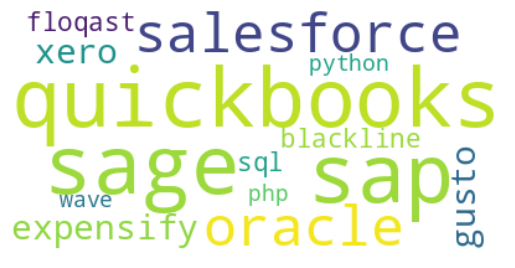

In [73]:
text = ' '.join(top_technical_skills['Words'].tolist())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

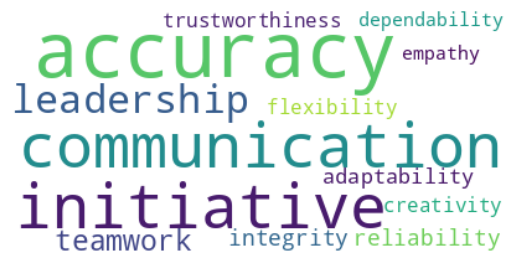

In [74]:
text = ' '.join(top_personality_skills['Words'].tolist())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

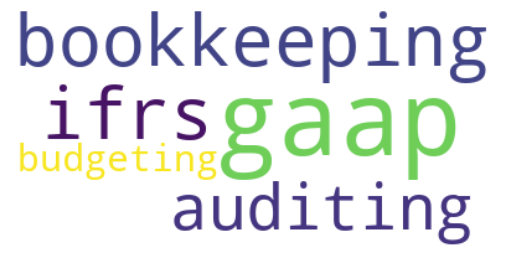

In [75]:
text = ' '.join(top_accounting_skills['Words'].tolist())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()